<a href="https://colab.research.google.com/github/kalingasajja/ML-learn/blob/main/1_preprocessing_and_EDA_for_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preprocessing _ &_ EDA


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.sample()['clean_comment'].values

array([' twitterbakchodi'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df[df['clean_comment'].isna()]


,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df[~(df['clean_comment'].str.strip()=='')]

In [ ]:
# Converting the clean_comment column to lowercase
df.loc[:,'clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df[df['clean_comment'].apply(lambda x:x.endswith(' ' or x.startswith(" ")))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Remove trailing and leading whitespaces from the clean_comment column
df['clean_comment'] = df['clean_comment'].str.strip()
# verifying the transformation for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x:x.endswith(" ") or x.startswith(" ")).sum()


np.int64(0)

In [ ]:
# Identify comments conatinging URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*||(||),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern,regex=True)]

comments_with_urls.head()

,clean_comment,category


In [ ]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# REmoving newline characters from 'clean_comment' column
df.loc[:,'clean_comment'] = df['clean_comment'].str.replace('\n','',regex=True)
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category


<Axes: xlabel='category', ylabel='count'>

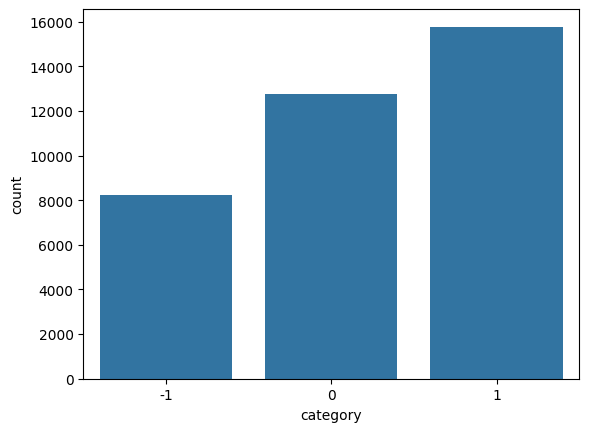

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes
sns.countplot(data=df,x='category')


In [ ]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
df.loc[:,'word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
df.sample(5)

,clean_comment,category,word_count
19217,age empires khel raha hai chutiya,0,6
29707,grandfather was staunch rss guy with his and h...,1,177
33148,now will watch this stand,0,5
4148,you don need crops with technology like this,0,8
31265,asking and will ask any government who power t...,1,20


In [ ]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.646645
std,56.648801
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


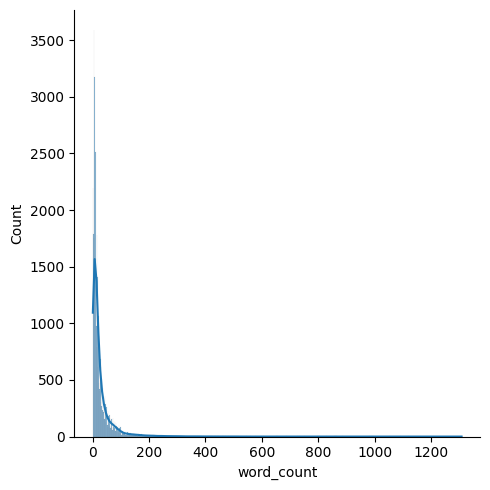

In [ ]:
sns.displot(data=df,x='word_count',kde=True)

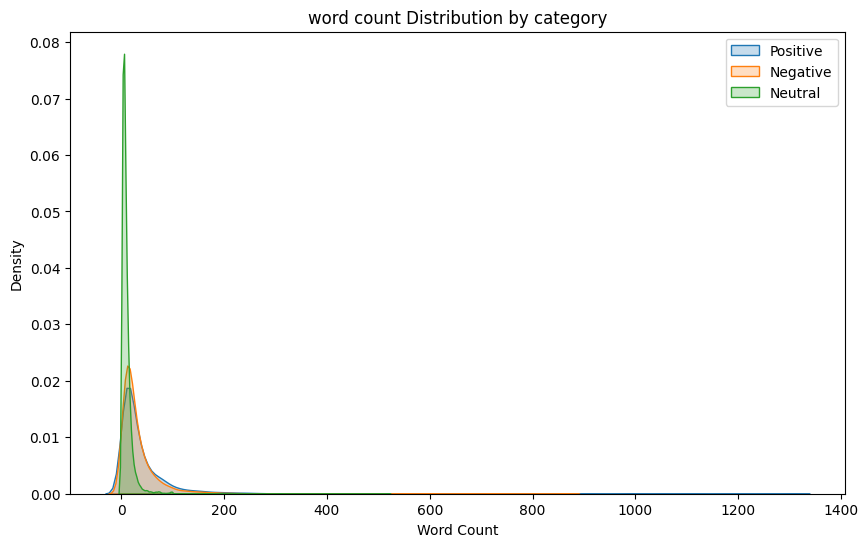

In [ ]:
plt.figure(figsize=(10,6))

#plot KDE(kernal Density Estimation) for category 1
sns.kdeplot(df[df['category']==1]['word_count'],label='Positive',fill=True)
#plot KDE(kernal Density Estimation) for category 0
sns.kdeplot(df[df['category']==-1]['word_count'],label='Negative',fill=True)
#plot KDE(kernal Density Estimation) for category 1
sns.kdeplot(df[df['category']==0]['word_count'],label='Neutral',fill=True)

# Add title and labels
plt.title("word count Distribution by category")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

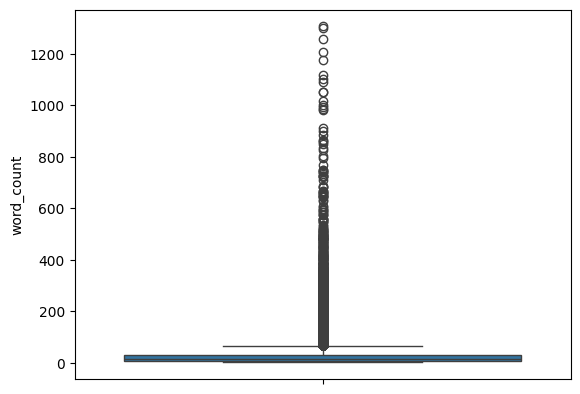

In [ ]:
sns.boxplot(df['word_count'])

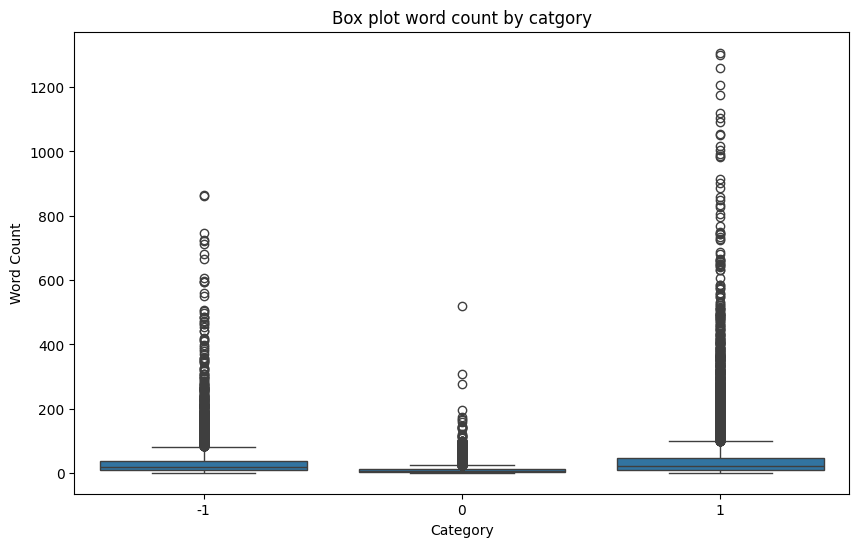

In [ ]:
# displaying word count using boxplot by categorized by category
plt.figure(figsize=(10,6))

sns.boxplot(data=df,x='category',y='word_count')
plt.title("Box plot word count by catgory")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

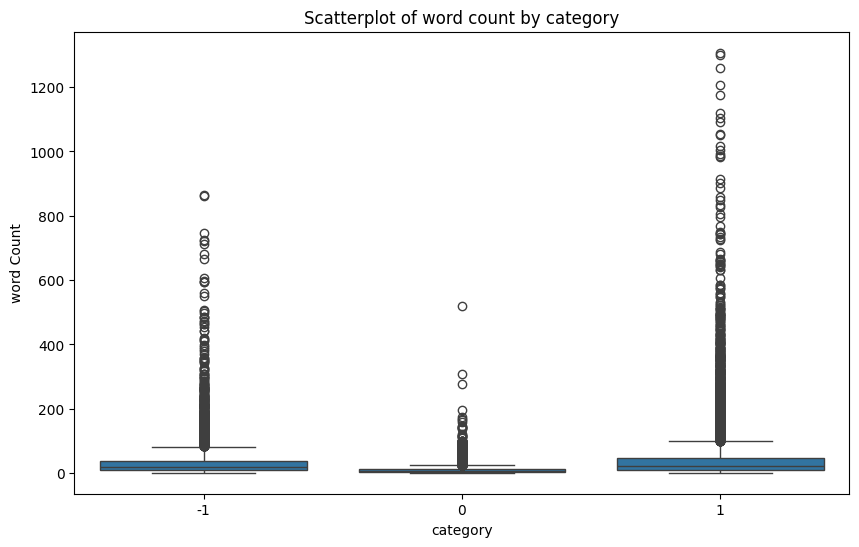

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='category',y='word_count')
plt.title('Scatterplot of word count by category')
plt.xlabel('category')
plt.ylabel('word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

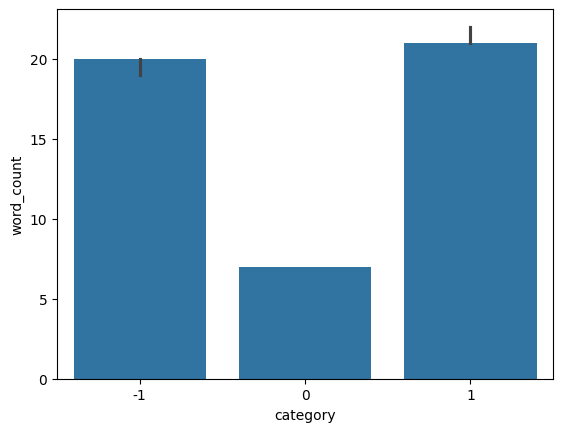

In [ ]:
sns.barplot(data=df,x='category',y='word_count',estimator='median')

In [ ]:
!pip install nltk


In [ ]:
from nltk.corpus import stopwords
import nltk

# Downloading NLTK stopwords if not downloaded
nltk.download('stopwords')

#defining list of English stopwords
stop_words = set(stopwords.words('english'))

#create a new column 'num_stop_words' by counting the number of stopwords in each column
df['num_stop_words'] = df['clean_comment'].apply(lambda x : len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
31017,video seems blank now nvm just gpu dying thats...,0,10,3
8393,team standard witten ertz,0,4,0
9630,thought this guy would the only credible oppos...,-1,21,9
17023,modiji understands the indian society very wel...,-1,15,4
10080,team ppr tyrell wiliams @ hou ivory @ buf sproles,0,10,0


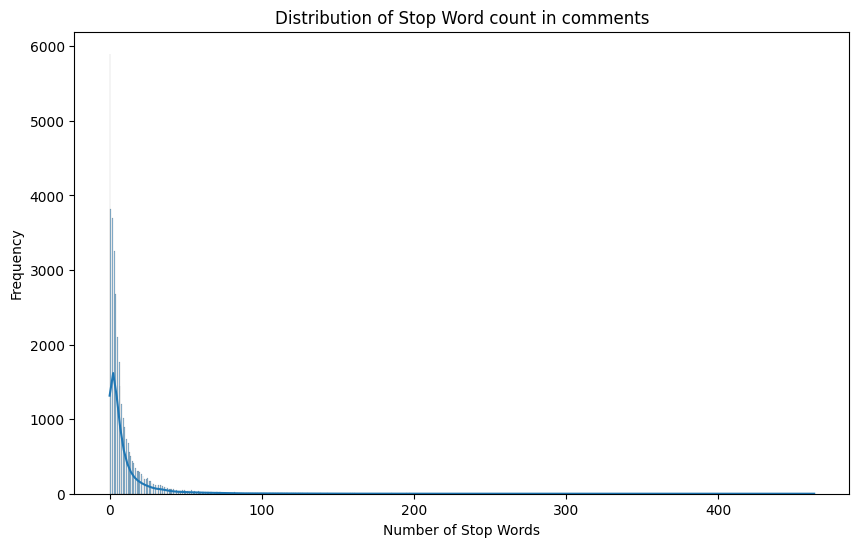

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df['num_stop_words'],kde=True)
plt.title("Distribution of Stop Word count in comments")
plt.xlabel("Number of Stop Words")
plt.ylabel("Frequency")
plt.show()

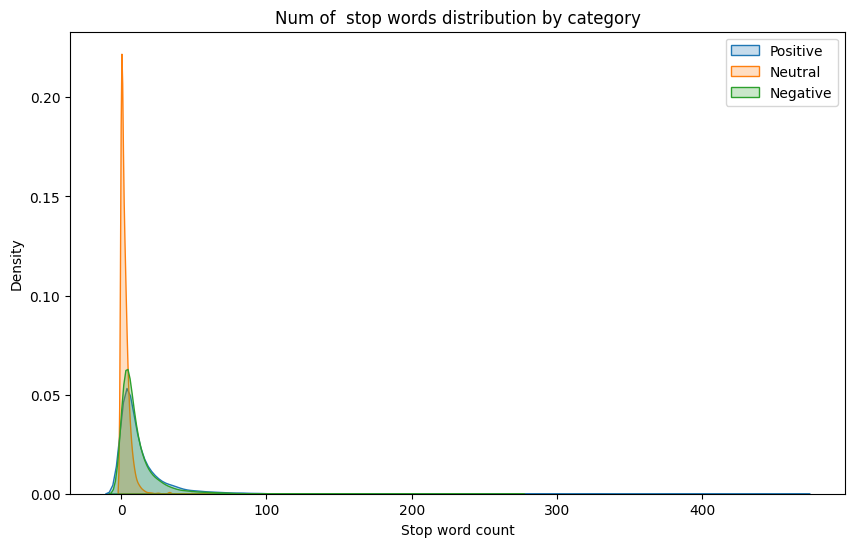

In [ ]:
plt.figure(figsize=(10,6))

# Plot KDE for category 1
sns.kdeplot(df[df['category']==1]['num_stop_words'],label="Positive",fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category']==0]['num_stop_words'],label="Neutral",fill=True)

# Plot KDE for category 1
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label="Negative",fill=True)
plt.title("Num of  stop words distribution by category")
plt.xlabel("Stop word count")
plt.ylabel("Density")
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

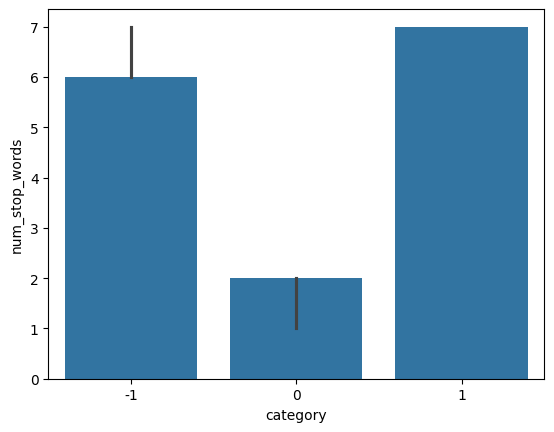

In [ ]:
sns.barplot(df,x='category',y='num_stop_words',estimator='median')


/tmp/ipython-input-157-4266316337.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')


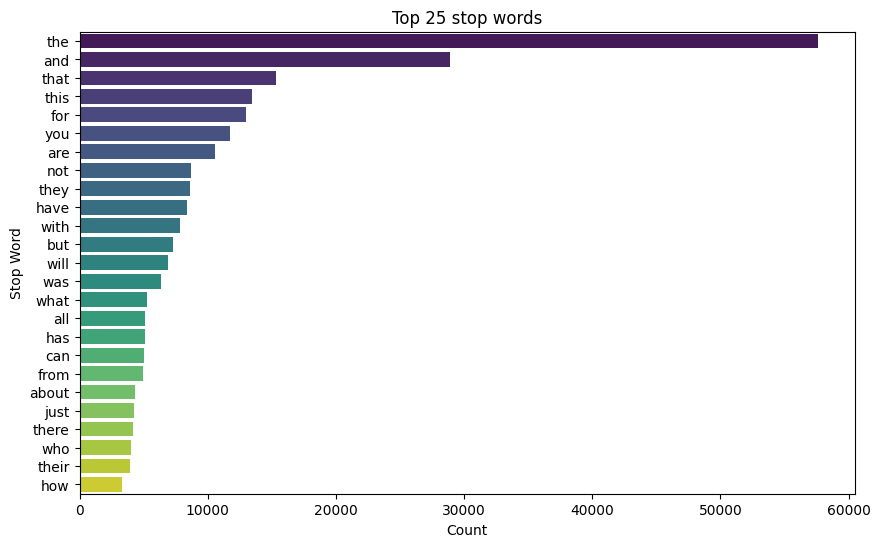

In [ ]:
from collections import Counter

# Extracting all stop words from each comment
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split()if word in stop_words]

# Frequency of each stop word
most_common_stop_words = Counter(all_stop_words).most_common(25)
# Top 25 most repeated stop words
top_25_df = pd.DataFrame(most_common_stop_words,columns=['stop_word','count'])
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')
plt.title("Top 25 stop words")
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [ ]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.831843
std,359.556617
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
from collections import Counter
# Combining all comments into one large string
all_text = ' '.join(df['clean_comment'])

char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',)

In [ ]:
char_frequency_df['character'].values

array(['∀', '￼', 'ಳ', ..., 't', 'e', ' '], dtype=object)

In [ ]:
char_frequency_df.head(50)

,character,frequency
551,∀,1
550,￼,1
549,ಳ,1
548,ಗ,1
547,ಕ,1
545,¿,1
544,ṭ,1
543,î,1
541,õ,1
539,ɔ,1


In [ ]:
# Cerating a new column 'num_punctuation_chars' to count puncuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in ',./!?;:"\'()[]{}-'])

)
df.sample(5)


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
27575,nežinau čia yra tiesos bet visai smagiai susis...,0,8,0,51,0
1460,ermm did you notice that both are different ac...,0,9,5,52,0
28634,army air force briefing,0,4,0,23,0
15955,old fart here happy for the fact that the youn...,1,47,19,260,0
1874,vwfc ousted reo coker brien demerit harvey kof...,0,21,0,152,0


In [ ]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-165-4220943967.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigrams',palette='magma')


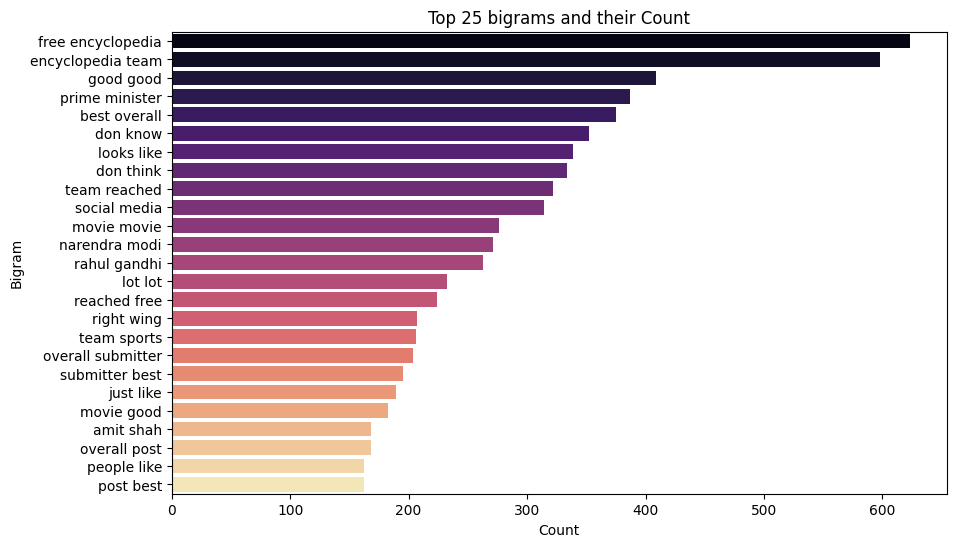

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# create a function to extract the top 25 bigrams

def get_top_ngrams(corpus,n=None):
  vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]
top_25_bigrams = get_top_ngrams(df['clean_comment'],25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams,columns=['bigrams','count'])
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigrams',palette='magma')
plt.title("Top 25 bigrams and their Count")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.show()

/tmp/ipython-input-166-293360116.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df,x='count',y='bigrams',palette='magma')


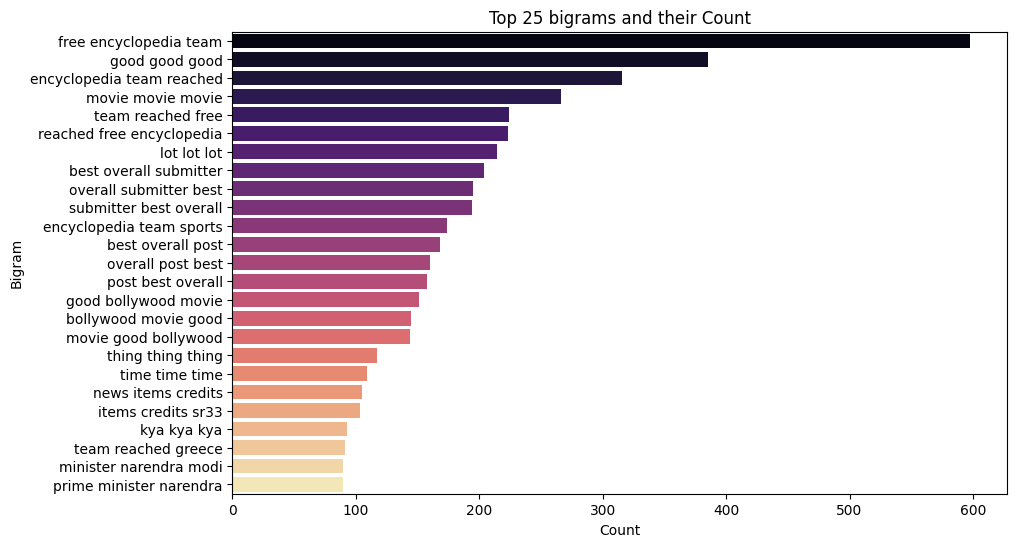

In [ ]:
# create a function to extract the top 25 trigrams

def get_top_ngrams(corpus,n=None):
  vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]
top_25_trigrams = get_top_ngrams(df['clean_comment'],25)

top_25_trigrams_df = pd.DataFrame(top_25_trigrams,columns=['bigrams','count'])
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_trigrams_df,x='count',y='bigrams',palette='magma')
plt.title("Top 25 bigrams and their Count")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.show()

In [ ]:
# Keeping only standard english letters and removing all foreign letters
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x : re.sub(r'[^A-Za-z0-9\s!?,.]','',str(x)))

In [ ]:
all_text = ' '.join(df['clean_comment'])
char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(),columns=['char','frequency']).sort_values(by='frequency')
char_frequency_df



,char,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))-{'not','but','however','no','yet'}

# Remove stopwords from 'clean_comment' column,retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x:' '.join([word for word in x.split() if word.lower() not in stop_words])
)


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# define lemmetizer
lemmatizer = WordNetLemmatizer()
# Appplying lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x:' '.join([lemmatizer.lemmatize(word) for word in x.split()])

)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


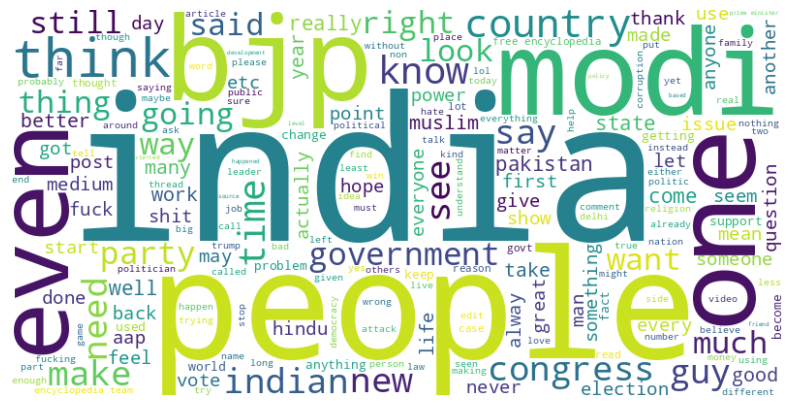

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  word_cloud = WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,6))
  plt.imshow(word_cloud,interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df['clean_comment'])

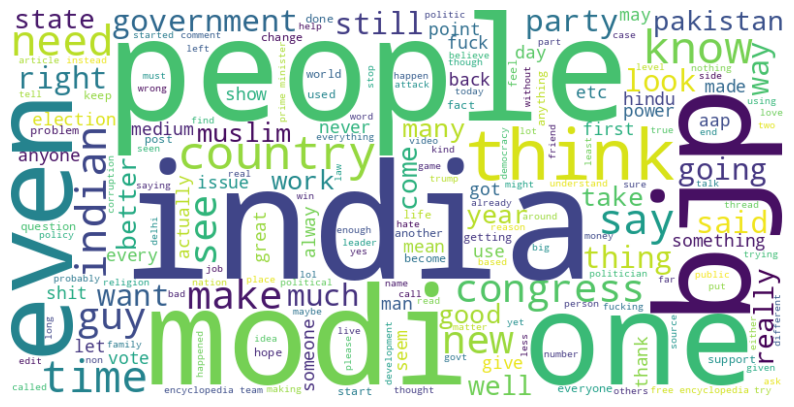

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  word_cloud = WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,6))
  plt.imshow(word_cloud,interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df['clean_comment'])

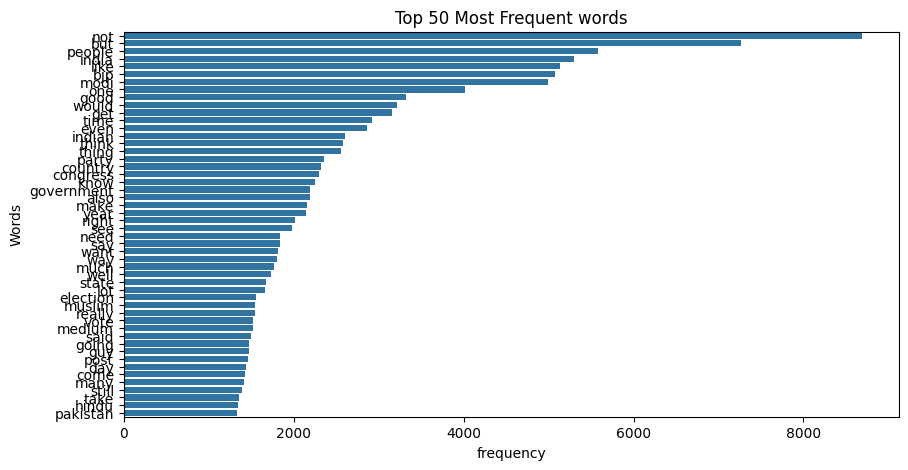

In [ ]:
def plot_top_n_words(df,n=20):
  """plot the top N most frequent words in the dataset."""
  # Flatten all words in the content column
  words = ' '.join(df['clean_comment']).split()

  # Get top N most common words
  counter= Counter(words)
  most_common_words = counter.most_common(n)

  #Split the words and their counts for plotting
  words,counts = zip(*most_common_words)

  #Plotting the top N words
  plt.figure(figsize=(10,5))
  sns.barplot(x=list(counts),y=list(words))
  plt.title(f"Top {n} Most Frequent words")
  plt.xlabel('frequency')
  plt.ylabel("Words")
  plt.show()

plot_top_n_words(df,n=50)


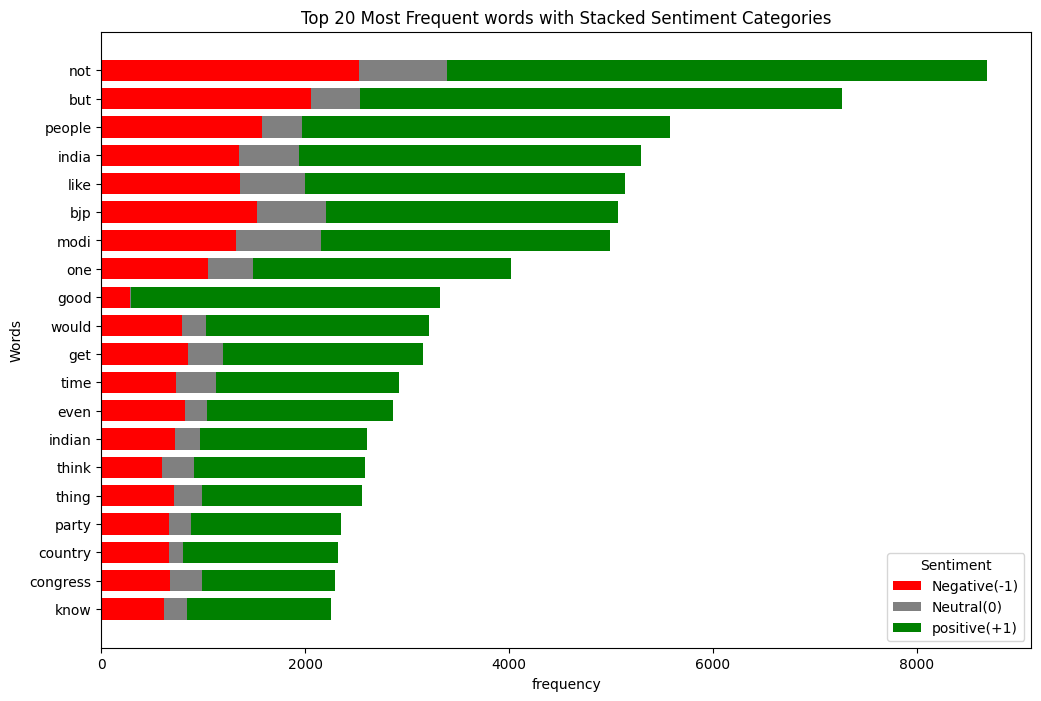

In [ ]:
def plot_top_n_words_by_category(df,n=20,start=0):

  word_category_counts = {}
  for idx,row in df.iterrows():
    words = row['clean_comment'].split()
    category = row['category']

    for word in words:
      if word not in word_category_counts:
        word_category_counts[word] = {-1:0,0:0,1:0}
      word_category_counts[word][category]+=1
  total_word_counts = {word:sum(counts.values()) for word,counts in word_category_counts.items()}

  most_common_words = sorted(total_word_counts.items(),key=lambda x:x[1],reverse=True)[start:start+n]
  top_words = [word for word, _ in most_common_words]

  word_labels = top_words
  negative_counts = [word_category_counts[word][-1] for word in top_words]
  neutral_counts = [word_category_counts[word][0] for word in top_words]
  positive_counts = [word_category_counts[word][1] for word in top_words]

  plt.figure(figsize=(12,8))
  bar_width = 0.75

  plt.barh(word_labels,negative_counts,color='red',label='Negative(-1)',height=bar_width)
  plt.barh(word_labels,neutral_counts,left=negative_counts,color='grey',label='Neutral(0)',height=bar_width)
  plt.barh(word_labels,positive_counts,left=[i+j for i,j in zip(negative_counts,neutral_counts)],color='green',label='positive(+1)',height=bar_width)
  plt.title(f"Top {n} Most Frequent words with Stacked Sentiment Categories")
  plt.xlabel('frequency')
  plt.ylabel("Words")
  plt.gca().invert_yaxis()
  plt.legend(title='Sentiment',loc='lower right')
  plt.show()


plot_top_n_words_by_category(df,n=20)